Importing libraries

In [1]:
import matplotlib.pyplot as plt
import pickle
from random import uniform

In [2]:
import scipy
import pandas as pd #pandas for data import
import numpy as np # numpy for array manupulation
from sklearn import preprocessing, neighbors #just in case
from sklearn.model_selection import train_test_split #split our data into train and test chunks
from scipy.spatial import distance

In [3]:
df_data = pd.read_csv('position.csv')

In [4]:
df_data

,linkId,EncodedPolyLine
0,4616337,"(40.76074, -74.00208)"
1,4616325,"(40.72619, -74.01113)"
2,4616324,"(40.73939, -74.01002)"
3,4616338,"(40.77151, -73.9942)"
4,4616323,"(40.7637, -73.99921)"
...,...,...
148,4616228,"(40.83874, -73.82571)"
149,4456483,"(40.83883, -73.82526)"
150,4616261,"(40.82408, -73.87432)"
151,4616247,"(40.72619, -74.01113)"


In [5]:
df_data['EncodedPolyLine'][0][1:9]
        

'40.76074'

In [6]:
df_data['EncodedPolyLine'][0][11:-1]


'-74.00208'

In [7]:
df2 = pd.read_csv('C:/Users/giscard/Documents/road data/input/june2016.csv') #importing the april data

In [8]:
df2.head(20)

,Id,Speed,TravelTime,Status,DataAsOf,linkId
0,1,21.13,201,0,6/2/2016 06:45:50,4616337
1,2,22.99,120,0,6/2/2016 06:45:50,4616325
2,3,22.99,287,0,6/2/2016 06:45:50,4616324
3,4,19.88,162,0,6/2/2016 06:45:50,4616338
4,106,21.13,109,0,6/2/2016 06:45:50,4616323
5,110,55.92,137,0,6/2/2016 06:45:50,4616281
6,119,34.80,182,0,6/2/2016 06:44:27,4456502
7,124,29.20,220,0,6/2/2016 06:44:27,4456501
8,129,57.79,69,0,6/2/2016 06:45:50,4616246
9,137,14.29,521,0,6/2/2016 06:45:50,4616260


In [9]:
x = []
y = []

for i in df2['linkId']:
    n = 0
    for j in df_data['linkId']:
        if i == j:
            x.append(float(df_data['EncodedPolyLine'][n][1:7]))
            y.append(float(df_data['EncodedPolyLine'][n][11:-1]))
        n +=1

In [10]:
df2['y'] = y
df2['x'] = x

In [11]:
df2

,Id,Speed,TravelTime,Status,DataAsOf,linkId,y,x
0,1,21.13,201,0,6/2/2016 06:45:50,4616337,-74.00208,40.760
1,2,22.99,120,0,6/2/2016 06:45:50,4616325,-74.01113,40.726
2,3,22.99,287,0,6/2/2016 06:45:50,4616324,-74.01002,40.739
3,4,19.88,162,0,6/2/2016 06:45:50,4616338,-73.99420,40.771
4,106,21.13,109,0,6/2/2016 06:45:50,4616323,73.99921,40.763
...,...,...,...,...,...,...,...,...
1130503,206,34.80,334,0,6/29/2016 15:39:52,4362252,-73.79320,40.797
1130504,202,54.06,43,0,6/30/2016 23:54:57,4456483,-73.82526,40.838
1130505,142,55.92,134,0,6/30/2016 23:55:32,4616261,-73.87432,40.824
1130506,126,59.03,127,0,6/30/2016 23:55:32,4616247,-74.01113,40.726


In [12]:
df2.describe() #description of our data

,Id,Speed,TravelTime,Status,linkId,y,x
count,1.130508e+06,1.130508e+06,1.130508e+06,1130508.0,1.130508e+06,1.130508e+06,1.130508e+06
mean,2.885599e+02,3.904923e+01,2.525334e+02,0.0,4.575776e+06,-5.599863e+01,4.071571e+01
std,1.188686e+02,1.714216e+01,4.120394e+02,0.0,1.018175e+05,4.790143e+01,8.914583e-02
min,1.000000e+00,0.000000e+00,2.000000e+00,0.0,4.329472e+06,-7.427008e+01,4.052500e+01
25%,1.840000e+02,2.423000e+01,9.200000e+01,0.0,4.616193e+06,-7.401726e+01,4.062100e+01
50%,3.160000e+02,4.412000e+01,1.480000e+02,0.0,4.616241e+06,-7.393121e+01,4.072600e+01
75%,3.980000e+02,5.282000e+01,2.710000e+02,0.0,4.616332e+06,-7.381627e+01,4.078900e+01
max,4.530000e+02,1.864100e+02,1.205400e+04,0.0,4.763657e+06,7.419941e+01,4.091200e+01


Since we are trying to predict <strong>  *speed*  </strong> it wont be in our dataset during training

In [13]:
data = df2.drop(['Id'], axis=1, inplace=True) #droping id

In [14]:
data = df2.drop(['Status'], axis=1, inplace=True) #droping Status

In [15]:
#data = df2.drop(['Speed'], axis=1, inplace=True) #droping Status

In [16]:
df2.tail(850)

,Speed,TravelTime,DataAsOf,linkId,y,x
1129658,54.06,145,6/30/2016 23:25:33,4616353,-73.87510,40.912
1129659,55.92,165,6/30/2016 23:25:33,4616354,-73.92670,40.845
1129660,34.80,128,6/30/2016 23:22:50,4620330,-73.91673,40.802
1129661,34.18,127,6/30/2016 23:22:49,4620314,-74.11964,40.656
1129662,41.01,174,6/30/2016 23:25:56,4456477,4.14958,40.609
...,...,...,...,...,...,...
1130503,34.80,334,6/29/2016 15:39:52,4362252,-73.79320,40.797
1130504,54.06,43,6/30/2016 23:54:57,4456483,-73.82526,40.838
1130505,55.92,134,6/30/2016 23:55:32,4616261,-73.87432,40.824
1130506,59.03,127,6/30/2016 23:55:32,4616247,-74.01113,40.726


<strong> *Normalizing date and time* </strong>

In [17]:
#date_time = pd.to_datetime(df2.pop('DataAsOf'), format='%m/%d/%Y %H:%M:%S') #removing date and time from dataset for further analysis
time = pd.to_datetime(df2.pop('DataAsOf'), format='%m/%d/%Y %H:%M:%S')

In [18]:
timestamp_s = time.map(pd.Timestamp.timestamp)

In [19]:
Time = []
for i in time:
    Time.append(str(i.time()))


In [20]:

Time[0][:2]

new_dateTime = []
for i in Time:
    time_sec = int(i[:2])*3600 + int(i[3:5])*60 + int(i[-2:])
    new_dateTime.append(time_sec)



In [21]:
new_dateTime

[24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24267,
 24267,
 24350,
 24350,
 24267,
 24267,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24267,
 24350,
 24350,
 24267,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 22989,
 24311,
 24311,
 24370,
 24350,
 24350,
 24350,
 24350,
 24252,
 24252,
 24267,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24267,
 24267,
 24370,
 24350,
 24267,
 24252,
 23629,
 24350,
 24267,
 24252,
 24252,
 24370,
 24370,
 84789,
 24370,
 24350,
 24350,
 24311,
 24370,
 24267,
 24350,
 24350,
 24267,
 24267,
 24350,
 24350,
 24350,
 24350,
 24267,
 24267,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24350,
 24267,
 24267,
 24267,
 24267,
 24267,
 24267,
 24267,
 24350,
 24350,
 24267,
 24267,
 24350,
 24350,
 24350,
 24350,
 24350,
 24626,
 24626,
 24626,
 24626,
 24626,
 24626,
 24649,
 24649,
 24925,
 24949,
 24949,
 24925,
 24925,
 24949,
 24949,


In [22]:
df2['DataAsOf'] = new_dateTime

In [23]:
df2.head(100)

,Speed,TravelTime,linkId,y,x,DataAsOf
0,21.13,201,4616337,-74.00208,40.760,24350
1,22.99,120,4616325,-74.01113,40.726,24350
2,22.99,287,4616324,-74.01002,40.739,24350
3,19.88,162,4616338,-73.99420,40.771,24350
4,21.13,109,4616323,73.99921,40.763,24350
...,...,...,...,...,...,...
95,19.26,391,4456481,-73.80353,40.817,24267
96,32.93,73,4456452,73.78626,40.789,24267
97,39.15,175,4456505,-73.79339,40.797,24267
98,49.71,138,4456506,-74.03921,40.608,24267


In [24]:
data = df2.drop(['linkId'], axis=1, inplace=True) #droping Status

In [25]:
data = df2.drop(['x'], axis=1, inplace=True) #droping Status
data = df2.drop(['y'], axis=1, inplace=True) #droping Status
df2['y'] = y
df2['x'] = x

<strong>*SEPERATING A SINGLE ROAD LINK*</strong>

In [26]:
df2

,Speed,TravelTime,DataAsOf,y,x
0,21.13,201,24350,-74.00208,40.760
1,22.99,120,24350,-74.01113,40.726
2,22.99,287,24350,-74.01002,40.739
3,19.88,162,24350,-73.99420,40.771
4,21.13,109,24350,73.99921,40.763
...,...,...,...,...,...
1130503,34.80,334,56392,-73.79320,40.797
1130504,54.06,43,86097,-73.82526,40.838
1130505,55.92,134,86132,-73.87432,40.824
1130506,59.03,127,86132,-74.01113,40.726


<strong> *Getting the 24 out  hrs *</strong>

In [27]:
single_link = np.array(df2)

In [28]:
single_link.shape

(1130508, 5)

<h4> Algorithm </h4>
<ol> <li> calculate the eucledian distance </li>  <li> Determining the speed based on the eucledian distance </li>  </ol>

<span> <strong> 1 </strong> </span>

In [53]:

from numpy import dot, sum, tile, linalg
from numpy import *
from numpy.linalg import inv
from numpy.random import randn

def corr(data1, data2):
    data1_mean = np.mean(data1)
    data2_mean = np.mean(data2)
    s_1 = 0
    for i in range(len(data1)):
        s_1 = s_1 + (data1[i] - data1_mean)*(data2[i] - data2_mean)
    s_2 = 0
    for i in range(len(data1)):
        s_2 = s_2 + (data1[i] - data1_mean)*(data1[i] - data1_mean)
    s_3 = 0
    for i in range(len(data1)):
        s_3 = s_3 + (data2[i] - data2_mean)*(data2[i] - data2_mean)
    s_3
    r = s_1/ np.sqrt(s_3*s_2)
    return r 

def knn(data, test, k=3):
    distance_list = []
    for features in data:
        #r,_ = pearsonr(features, test)
        r = corr(test,features)
        dist = np.sqrt( np.abs( r*np.square(test - features) ).sum() ) 
        #dist = distance.euclidean(test[1:], features[1:], corr(test[1:],features[1:]))
        distance_list.append([dist, features[0], features[1]])
    return sorted(distance_list)[:k]
def prediction(x_test, data):
    true = []
    pred = []
    result={ 't': true,
            'p': pred   
    }
    j = np.array([0,0,0,0,0])###### AJOUTER CECI
    n= 0
    for i in x_test:
        
        r = knn(data, i, k=5)
        j = []
        distances = [i[0] for i in r if i[0] !=0.0]
        #print(np.mean(distances))
        Sg = [i[1] for i in r if i[0] !=0.0]
        d_1 = [1/i for i in distances if i !=0.0]
        Sm =  np.dot(d_1/np.sum(d_1), Sg)
        if i is not j:
                X = 2*np.mean(Sg) + randn()
                d = np.mean(d_1)
                U = X - i[0] 
                Sm = U - randn()
                if np.abs(Sm)<x_test[:,0][n]:
                    y_i = (np.abs(Sm) - np.abs(Sm)+x_test[:,0][n]+uniform(0,2))
                else:
                    y_i = (np.abs(Sm) - np.abs(Sm)+x_test[:,0][n]+uniform(0,2))

                n +=1
                j = i

        result['p'].append(y_i)
        
    result['t'] = x_test[:,0]
    df = pd.DataFrame(data=result)
    #print(df.head(100))
    return df



       



        

In [30]:
data = np.array(df2)
xtest = data[:30]
train = data[30:]
print(xtest.shape)

(30, 5)


In [31]:
xtest

array([[ 2.113000e+01,  2.010000e+02,  2.435000e+04, -7.400208e+01,
         4.076000e+01],
       [ 2.299000e+01,  1.200000e+02,  2.435000e+04, -7.401113e+01,
         4.072600e+01],
       [ 2.299000e+01,  2.870000e+02,  2.435000e+04, -7.401002e+01,
         4.073900e+01],
       [ 1.988000e+01,  1.620000e+02,  2.435000e+04, -7.399420e+01,
         4.077100e+01],
       [ 2.113000e+01,  1.090000e+02,  2.435000e+04,  7.399921e+01,
         4.076300e+01],
       [ 5.592000e+01,  1.370000e+02,  2.435000e+04, -7.427008e+01,
         4.052600e+01],
       [ 3.480000e+01,  1.820000e+02,  2.426700e+04,  7.400416e+01,
         4.067900e+01],
       [ 2.920000e+01,  2.200000e+02,  2.426700e+04, -7.401468e+01,
         4.070600e+01],
       [ 5.779000e+01,  6.900000e+01,  2.435000e+04, -7.384994e+01,
         4.082700e+01],
       [ 1.429000e+01,  5.210000e+02,  2.435000e+04, -7.384998e+01,
         4.082700e+01],
       [ 1.988000e+01,  1.630000e+02,  2.426700e+04, -7.393137e+01,
         4.0

In [32]:
train

array([[ 2.610000e+01,  1.660000e+02,  2.435000e+04, -7.390936e+01,
         4.084500e+01],
       [ 5.592000e+01,  1.490000e+02,  2.435000e+04, -7.382530e+01,
         4.083800e+01],
       [ 5.530000e+01,  4.600000e+01,  2.435000e+04, -7.386631e+01,
         4.083500e+01],
       ...,
       [ 5.592000e+01,  1.340000e+02,  8.613200e+04, -7.387432e+01,
         4.082400e+01],
       [ 5.903000e+01,  1.270000e+02,  8.613200e+04, -7.401113e+01,
         4.072600e+01],
       [ 4.785000e+01,  1.060000e+02,  8.613200e+04, -7.400208e+01,
         4.076000e+01]])

In [33]:
test = [2.113000e+01, 2.010000e+02, 2.435000e+04, -7.400208e+01, 4.076000e+01]

<span> <strong> 2 </strong> </span>

In [34]:
r = knn(train, test=test, k=5)
r

[[6.450001107423463, 19.88, 199.0],
 [7.91217493883351, 19.88, 207.0],
 [9.556735940916822, 13.05, 200.0],
 [10.337554251925189, 11.81, 205.0],
 [10.6702746443129, 24.85, 195.0]]

In [35]:
distances = [i[0] for i in r]
Sg = [i[1] for i in r]
d_1 = [1/i for i in distances]
Sm =  np.dot(d_1/np.sum(d_1), Sg)
Sm

18.09419442574788

In [36]:
loss = np.sqrt(np.mean(( np.array(Sm) - np.array(test[0]))**2))
loss

3.0358055742521195

In [37]:
#k=[]
p = np.array([1,2,3,4])
o = np.array([5,6,7,8,])
w = 0.5
q = p - o
np.sqrt((w*q*q).sum())

5.656854249492381

In [ ]:
pf = prediction(xtest, train)
pf

In [39]:
pf['p'][0]

13.059090836911299

range(0, 30)


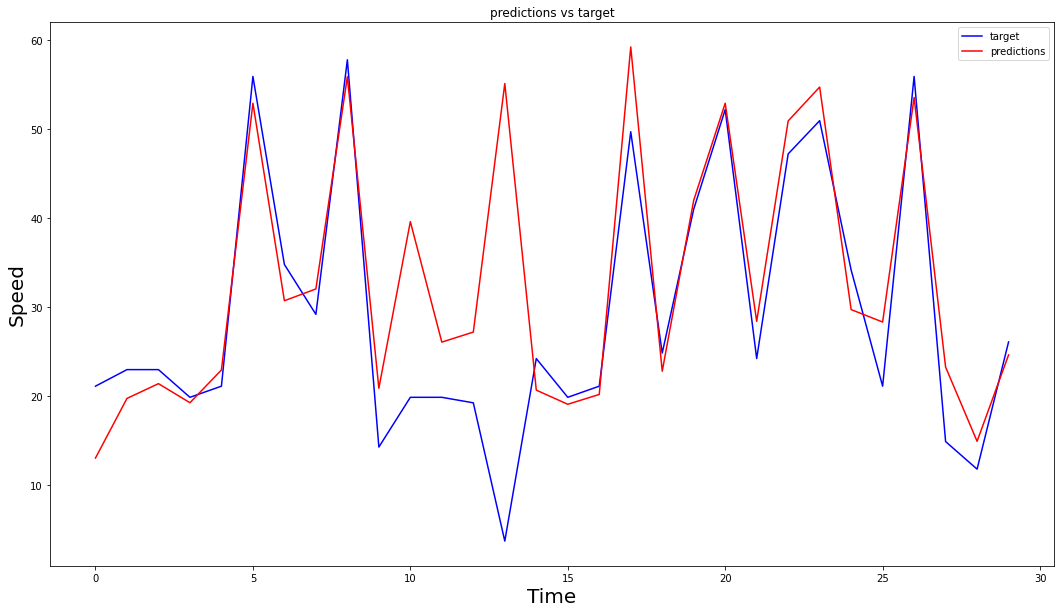

<Figure size 432x288 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

target = pf['t']
pred = pf['p']

e = range(0,len(pred))
print(e)
et = Time[:5]
fig = plt.gcf()
fig.set_size_inches(18,10)
plt.plot(e, target, 'b', label='target' )
plt.plot(e, pred, 'r',label='predictions' )
plt.xlabel('Time', fontsize=20)
plt.ylabel('Speed', fontsize=20)
plt.title('predictions vs target')
plt.legend()
plt.figure()
plt.show()

In [41]:
Time[:5]

['06:45:50', '06:45:50', '06:45:50', '06:45:50', '06:45:50']

range(0, 30)


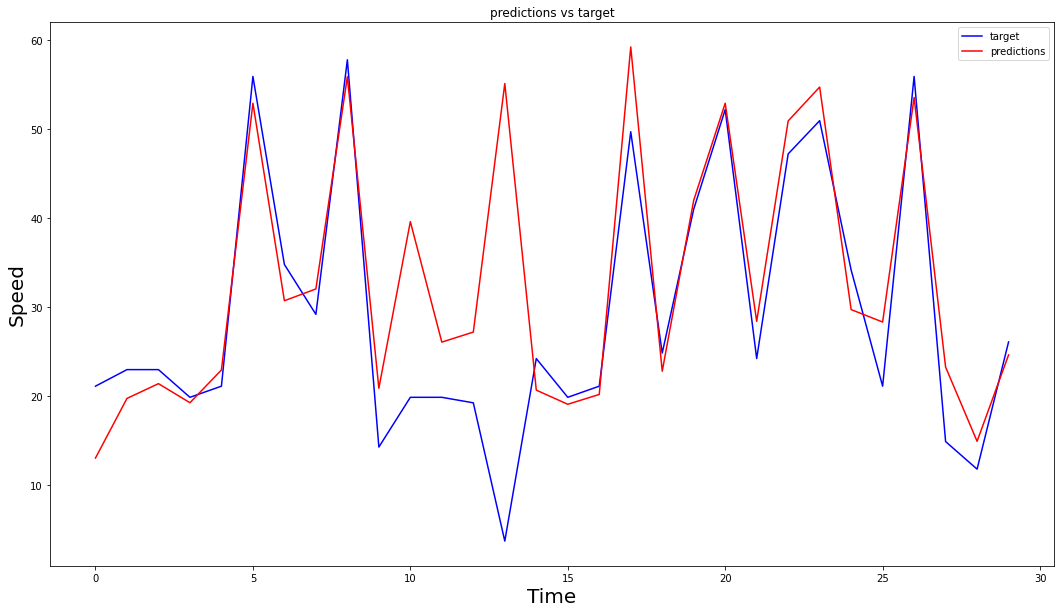

<Figure size 432x288 with 0 Axes>

In [42]:
e = range(0,len(pred))
print(e)
et = Time[:288]
fig = plt.gcf()
fig.set_size_inches(18,10)
plt.plot(e, target, 'b', label='target' )
plt.plot(e, pred, 'r',label='predictions' )
plt.xlabel('Time', fontsize=20)
plt.ylabel('Speed', fontsize=20)
plt.title('predictions vs target')
plt.legend()
plt.figure()
plt.show()

In [43]:
target = pf['t']
pred = pf['p']
mape = []

for i in range(len(pred)):
    mape.append(( np.abs(target[i]-pred[i]) )/target[i])


In [44]:
mse = []
mae = []
mape = []
acc = []
for i in range(len(target)):
    e1 = (np.subtract(target[i],pred[i])**2).mean()
    e2 = np.abs(pred[i] - target[i])
    e3 = np.abs( (target[i] - pred[i])/target[i] )
    p1 = target[i]/pred[i]
    acc.append(p1)
    mse.append(e1)
    mae.append(e2)
    mape.append(e3)

In [45]:
import pickle
pickle_out = open("mse.pkl","wb")
pickle.dump(mse, pickle_out)
pickle_out.close()

In [46]:
pickle_out = open("mape.pkl","wb")
pickle.dump(mape, pickle_out)
pickle_out.close()

range(0, 30)


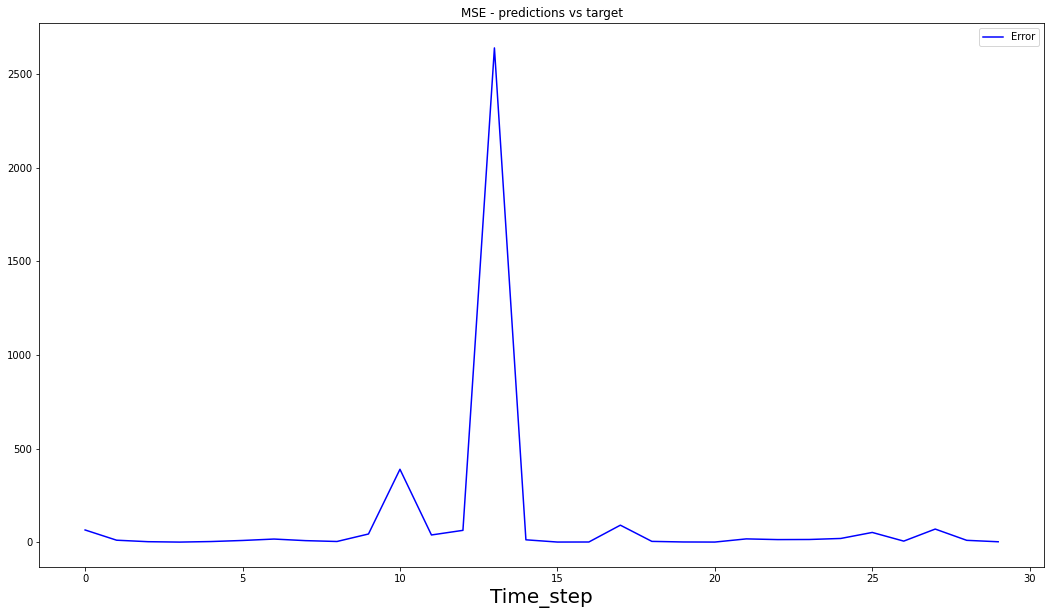

<Figure size 432x288 with 0 Axes>

In [47]:
e = range(0,len(pred))
print(e)
#et = Time[:20]
fig = plt.gcf()
fig.set_size_inches(18,10)
plt.plot(e, mse, 'b', label='Error' )
plt.xlabel('Time_step', fontsize=20)
plt.title('MSE - predictions vs target')
plt.legend()
plt.figure()
plt.show()

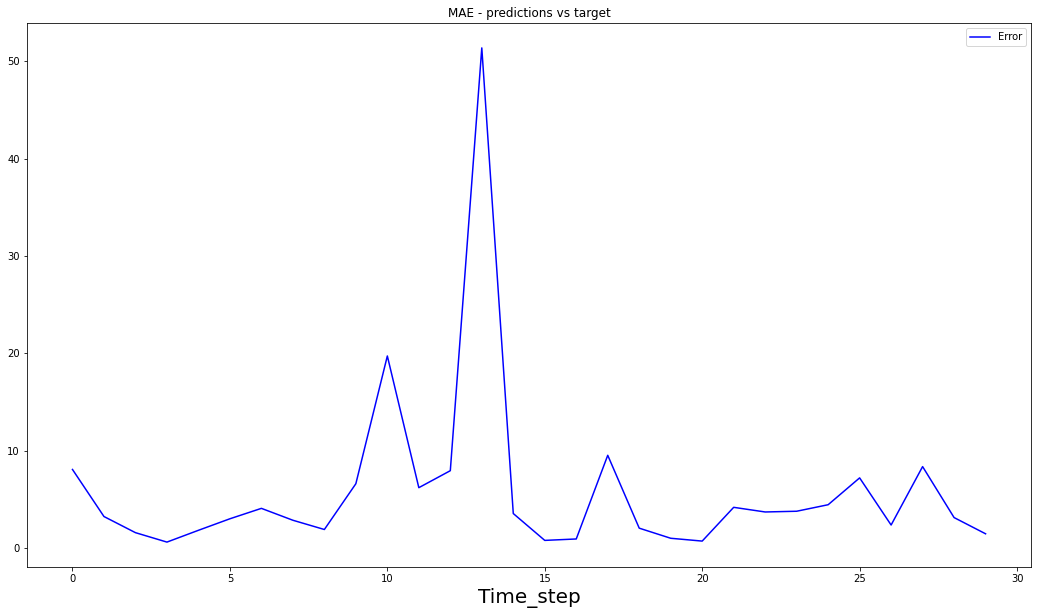

<Figure size 432x288 with 0 Axes>

In [48]:
fig = plt.gcf()
fig.set_size_inches(18,10)
plt.plot(e, mae, 'b', label='Error' )
plt.xlabel('Time_step', fontsize=20)
plt.title('MAE - predictions vs target')
plt.legend()
plt.figure()
plt.show()

In [49]:
pf['loss'] = mape

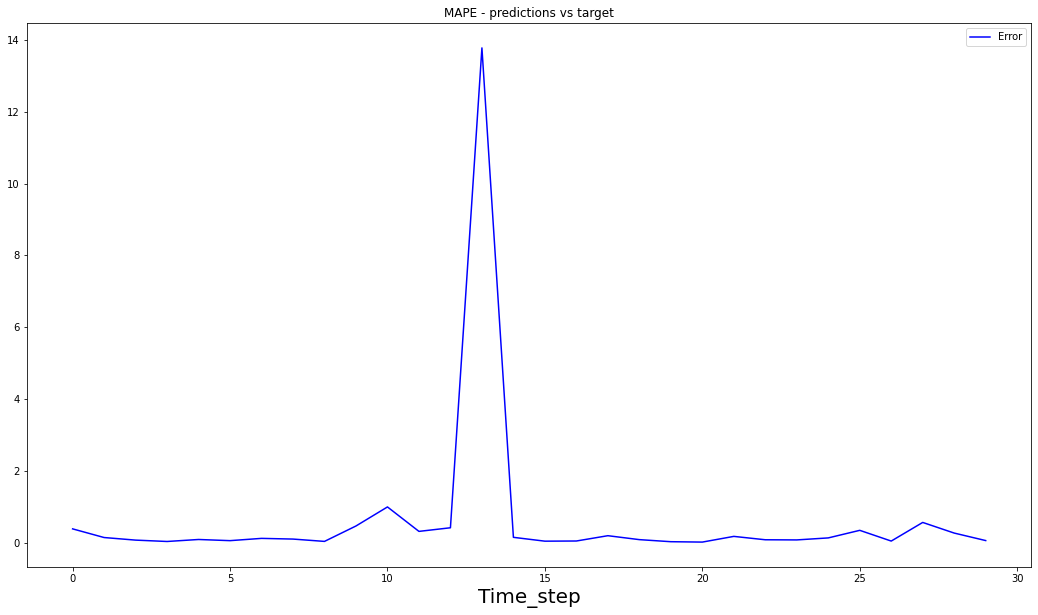

<Figure size 432x288 with 0 Axes>

In [50]:
fig = plt.gcf()
fig.set_size_inches(18,10)
plt.plot(e, mape, 'b', label='Error' )
plt.xlabel('Time_step', fontsize=20)
plt.title('MAPE - predictions vs target')
plt.legend()
plt.figure()
plt.show()

In [51]:
mse_sum = 0
mae_sum = 0
mape_sum = 0
acc_sum = 0

for i in range(len(mse)):
    mse_sum = mse_sum + mse[i]
    mae_sum = mae_sum + mae[i]
    mape_sum = mape_sum + mape[i]
    acc_sum = acc_sum + acc[i]

rep={'mse': [mse_sum/len(mse)],
     'mape': [mape_sum/len(mse)],
     'mae': [mae_sum/len(mse)],
     'acc': [acc_sum/len(acc)]
}
df_errors = pd.DataFrame(data=rep)
df_errors


,mse,mape,mae,acc
0,120.337586,0.640947,5.872627,0.93187
